In [ ]:
import numpy as np

import copy
import scipy

import matplotlib.pyplot as plt

#------------------------------------

import poseigen_seaside.basics as se
import poseigen_seaside.visuals as viz

import poseigen_trident.utils as tu

## Initial

In [3]:
epso = 1e-3

totalrange = np.arange(0, 40)

### Negative Binomial Distro

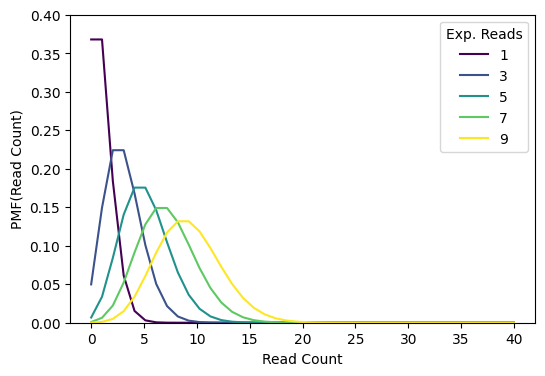

In [4]:
num_reads = 1000000

expects = np.arange(1, 10, 2)

negrans = []
for ex in expects: 
    p = num_reads / (num_reads + ex)
    negran = scipy.stats.nbinom.pmf(totalrange, num_reads, p)

    negrans.append(negran)

bounds_shar = [0, 0.4]


linep_args = {'legend': expects, 'legend_title': 'Exp. Reads',
              'bounds': bounds_shar,
                'color': None, 'cmap': 'viridis', 'alpha': 1.0, 'hline': None, 
                'xlabel': 'Read Count', 'ylabel': 'PMF(Read Count)', 'suptitle': None, 'text': None, 
                'xticklabel': None, 
                'figsize': (6, 4), 'fontsize': 10, 'ax': None}

ax = viz.LinePlot([[totalrange, x] for x in negrans], ** linep_args);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], (totalrange[-1] // 5) + 2), 
              labels = np.arange(totalrange[0], totalrange[-1]+5)[::5]);

### Gamma + Beta Distros

In [5]:
expects = np.arange(1, 10, 2)

#masterpseudo = 1e-4

totalrango = np.linspace(totalrange[0], totalrange[-1], 10000)

epso = 1e-10
totalrango_cont = totalrango.copy()
totalrango_cont[0] = epso
totalrango_cont

bounds_shar = [0, 0.4]

linep_args = {'legend': expects, 'legend_title': 'Exp. Reads',
              'bounds': bounds_shar,
                'color': None, 'cmap': 'viridis', 'alpha': 1.0, 'hline': None, 
                'xlabel': 'Read Count', 'ylabel': 'PDF(Read Count)', 'suptitle': None, 'text': None, 
                'xticklabel': None, 
                'figsize': (6, 4), 'fontsize': 10, 'ax': None}

#### Gamma 

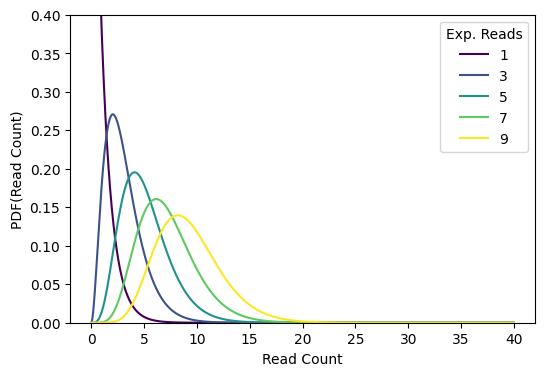

In [6]:
gambos = []
for ex in expects: 
    gambo= scipy.stats.gamma.pdf(totalrango_cont, ex)
    gambos.append(gambo)

ax = viz.LinePlot([[totalrango_cont, x] for x in gambos], ** linep_args);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], (totalrange[-1] // 5) + 2), 
              labels = np.arange(totalrange[0], totalrange[-1]+5)[::5]);

### Beta Prime Distribution

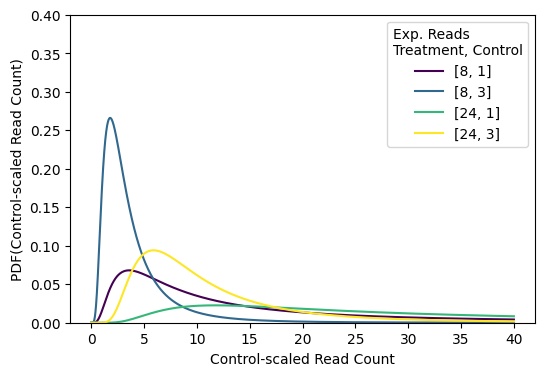

In [7]:

treats = [8, 24]
controls = [1, 3]

trecons = [[tre, con] for tre in treats for con in controls]


betaprimos = []
for tre, con in trecons: 
    betaprimo= scipy.stats.betaprime.pdf(totalrango_cont, tre, con)
    betaprimos.append(betaprimo)
  

linep_args2 = copy.deepcopy(linep_args)
linep_args2.update({'legend': trecons, 'legend_title': 'Exp. Reads \nTreatment, Control',
                    'xlabel': 'Control-scaled Read Count', 'ylabel': 'PDF(Control-scaled Read Count)'})                 
                    
    
ax = viz.LinePlot([[totalrango_cont, x] for x in betaprimos], ** linep_args2);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], (totalrange[-1] // 5) + 2), 
              labels = np.arange(totalrange[0], totalrange[-1]+5)[::5]);

### Negative log BP

In [8]:
totalrango_ext = np.linspace(epso, 1000, 10000)

betaprimos_ext = []
for tre, con in trecons: 
    betaprimo= scipy.stats.betaprime.pdf(totalrango_ext, tre, con)
    betaprimos_ext.append(betaprimo)

(0.0, 50.0)

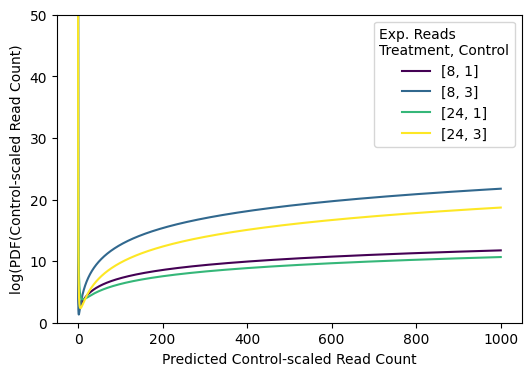

In [9]:
betaprimos_log = [-np.log(x) for x in betaprimos_ext]
  

linep_args2 = copy.deepcopy(linep_args)
linep_args2.update({'legend': trecons, 'legend_title': 'Exp. Reads \nTreatment, Control',
                    'xlabel': 'Predicted Control-scaled Read Count', 'ylabel': 'log(PDF(Control-scaled Read Count)', 
                    'bounds': None})                 
                    
    
ax = viz.LinePlot([[totalrango_ext, x] for x in betaprimos_log], ** linep_args2);

# ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], (totalrange[-1] // 5) + 2), 
#               labels = np.arange(totalrange[0], totalrange[-1]+5)[::5]);

ax.set_ylim(bottom = -0, top = 50)

(-20.0, 0.0)

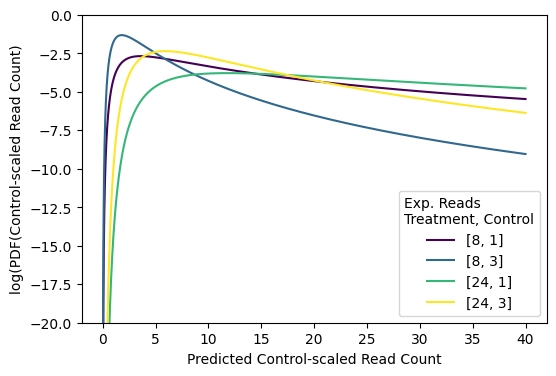

In [10]:
betaprimos_log = [np.log(x) for x in betaprimos]
  

linep_args2 = copy.deepcopy(linep_args)
linep_args2.update({'legend': trecons, 'legend_title': 'Exp. Reads \nTreatment, Control',
                    'xlabel': 'Predicted Control-scaled Read Count', 'ylabel': 'log(PDF(Control-scaled Read Count)', 
                    'bounds': None})                 
                    
    
ax = viz.LinePlot([[totalrango, x] for x in betaprimos_log], ** linep_args2);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], (totalrange[-1] // 5) + 2), 
              labels = np.arange(totalrange[0], totalrange[-1]+5)[::5]);

ax.set_ylim(bottom = -20, top = 0)

(0.0, 20.0)

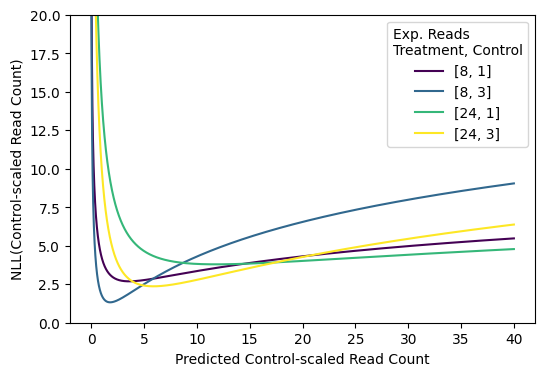

In [13]:
betaprimos_log = [-np.log(x) for x in betaprimos]
  

linep_args2 = copy.deepcopy(linep_args)
linep_args2.update({'legend': trecons, 'legend_title': 'Exp. Reads \nTreatment, Control',
                    'xlabel': 'Predicted Control-scaled Read Count', 'ylabel': 'NLL(Control-scaled Read Count)', 
                    'bounds': None})                 
                    
    
ax = viz.LinePlot([[totalrango, x] for x in betaprimos_log], ** linep_args2);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], (totalrange[-1] // 5) + 2), 
              labels = np.arange(totalrange[0], totalrange[-1]+5)[::5]);

ax.set_ylim(bottom = 0, top = 20)

### Beta Prime Comp. Rel.

In [ ]:
bp_revcompos = [tu.BetaPrime_CompRel(totalrango, np.array([tre]), np.array([con]), pseudo = 1e-10) for tre, con in trecons]

linep_args3 = copy.deepcopy(linep_args2)
linep_args3.update({ 'ylabel': 'comp-PD(Control-scaled Read Count)',  'bounds': [0, 1.01]})

ax = viz.LinePlot([[totalrango, x] for x in bp_revcompos], ** linep_args3);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], 10), labels = np.arange(totalrange[0], totalrange[-1] + 2)[::5]);

In [22]:
bp_revcompos

[array([1.        , 1.        , 1.        , ..., 0.93840824, 0.93842058,
        0.93843291], shape=(10000,)),
 array([1.        , 1.        , 1.        , ..., 0.99955685, 0.99955704,
        0.99955722], shape=(10000,)),
 array([1.        , 1.        , 1.        , ..., 0.62861792, 0.62867554,
        0.62873315], shape=(10000,)),
 array([1.        , 1.        , 1.        , ..., 0.9818852 , 0.981892  ,
        0.98189879], shape=(10000,))]

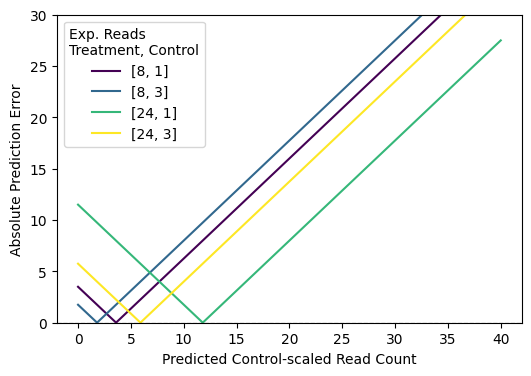

In [33]:
predicted = totalrango

bp_modos = [tu.BetaPrime_Mode(np.array([tre]), np.array([con])) for tre,con in trecons]

prederror = np.array([modo - predicted for modo in bp_modos])
absprederror = np.abs(prederror)

linep_args4 = copy.deepcopy(linep_args2)
linep_args4.update({ 'bounds': [0, 30], 
                    'xlabel': 'Predicted Control-scaled Read Count', 
                    'ylabel': 'Absolute Prediction Error'})    

ax = viz.LinePlot([[predicted, x] for x in absprederror], ** linep_args4);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], 9), 
              labels = np.arange(totalrange[0], totalrange[-1] + 2)[::5]);
ax.axhline(0, color = 'black', linestyle = '--', linewidth = 0.8)

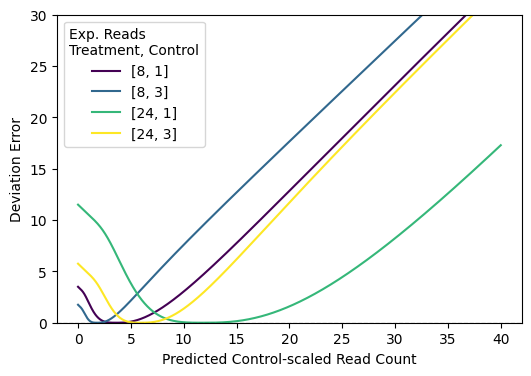

In [ ]:
bp_revcompos = np.array(bp_revcompos)
absprederror = np.array(absprederror)

deverror = absprederror * bp_revcompos

linep_args5 = copy.deepcopy(linep_args4)
linep_args5.update({'ylabel': 'Deviation Error'})    

ax = viz.LinePlot([[predicted, x] for x in deverror], ** linep_args5);

ax.set_xticks(np.linspace(totalrange[0], totalrange[-1], 9), 
              labels = np.arange(totalrange[0], totalrange[-1] + 2)[::5]);
ax.axhline(0, color = 'black', linestyle = '--', linewidth = 0.8)

# Types of Noise

In [3]:
windv_args = {'mode1': [np.mean, {}], 
              'win_size': 0.1, 'step': 0.005}


sez = 100000

samp_mi, samp_ma = 10, 100

initsamp = np.random.uniform(samp_mi, samp_ma, sez)

noiseadj = 0.2

noise = np.random.normal(loc = 0, scale = noiseadj, size = sez)

sca_args = {'alpha':0.2, 'xlabel': 'Real', 'figsize': (6, 4)}

#fig, ax = plt.subplots(2, 1)
ex_sca_args = {0: {'ylabel': 'Noised'}, 1: {'ylabel': 'Std.'}}

<Axes: xlabel='Real', ylabel='Noised'>

<Axes: xlabel='Real', ylabel='Std.'>

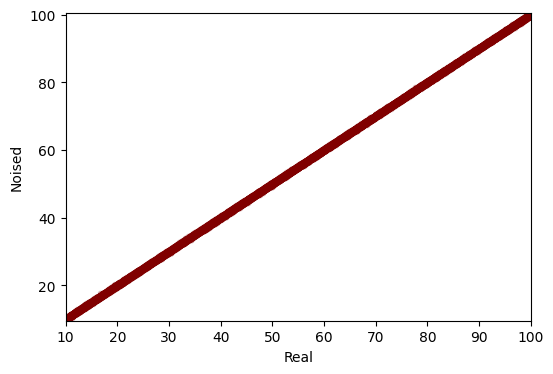

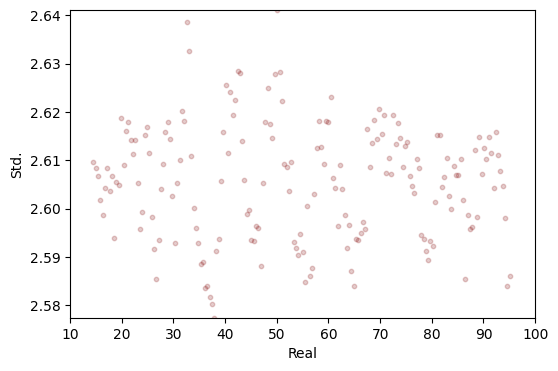

In [4]:
addnoise = initsamp + (noise)

addnoise_orig = [initsamp, addnoise]

addnoise_std  = se.WindowVal(initsamp, addnoise, 
                             mode2 = [np.std, {}], **windv_args)

for igset, gset in enumerate([addnoise_orig, addnoise_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xticks(np.linspace(samp_mi, samp_ma, 10), labels = np.arange(samp_mi, samp_ma + 2)[::10]);
    display(ax)

<Axes: xlabel='Real', ylabel='Noised'>

<Axes: xlabel='Real', ylabel='Std.'>

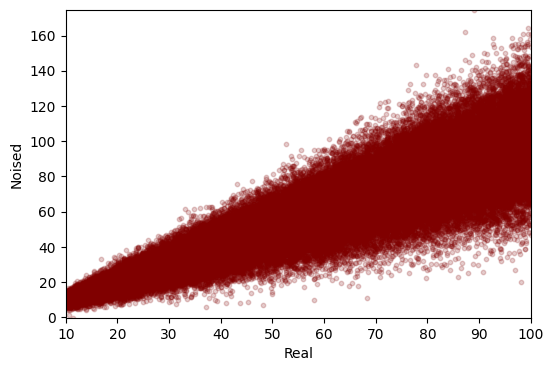

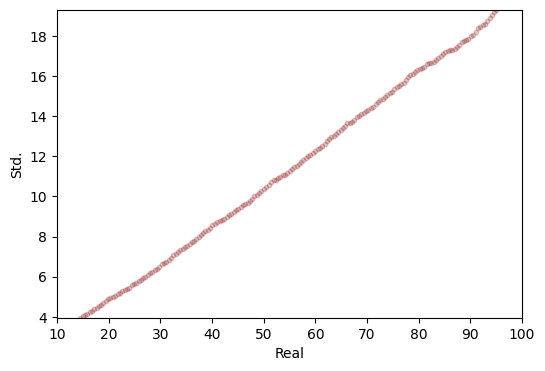

In [5]:
multnoise = initsamp + (initsamp* noise)

multnoise_orig = [initsamp, multnoise]

multnoise_std  = se.WindowVal(initsamp, multnoise, 
                             mode2 = [np.std, {}], **windv_args)


for igset, gset in enumerate([multnoise_orig, multnoise_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xticks(np.linspace(samp_mi, samp_ma, 10), labels = np.arange(samp_mi, samp_ma + 2)[::10]);
    display(ax)

<Axes: xlabel='log(Real)', ylabel='log(Noised)'>

<Axes: xlabel='log(Real)', ylabel='Std.'>

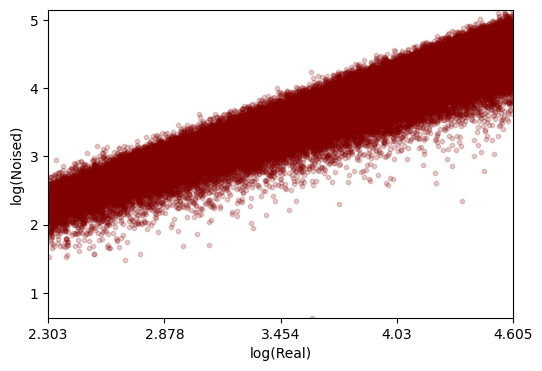

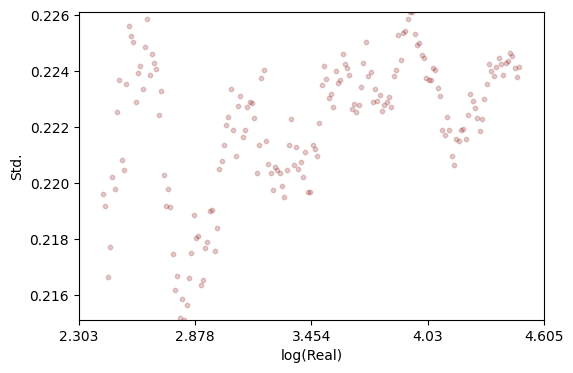

In [17]:
initsamp_log = np.log(initsamp)
lognoise = np.log(multnoise)

lognoise_orig = [initsamp_log, lognoise]

lognoise_std  = se.WindowVal(initsamp_log, lognoise, 
                             mode2 = [np.std, {}], **windv_args)


for igset, gset in enumerate([lognoise_orig, lognoise_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xticks(np.linspace(np.log(samp_mi), np.log(samp_ma), 5), labels = np.round(np.linspace(np.log(samp_mi), np.log(samp_ma), 5), 3))
    ax.set_xlabel('log(Real)')
    if igset == 0: ax.set_ylabel('log(Noised)')
    display(ax)

<Axes: xlabel='log(1 + Actual)', ylabel='log(1 + Noised)'>

<Axes: xlabel='log(1 + Actual)', ylabel='Std.'>

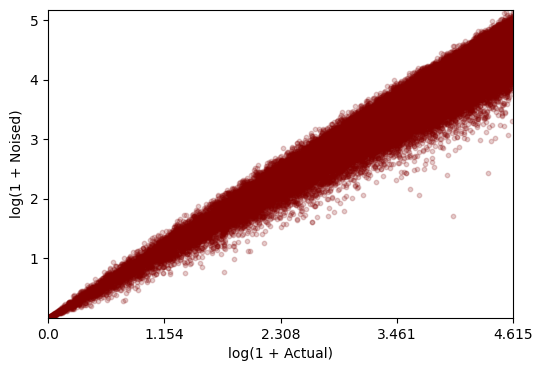

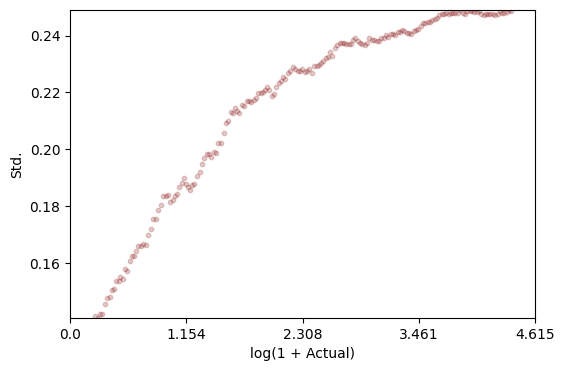

In [28]:
initsamp_log1 = np.log(1 + initsamp)
log1noise = np.log(1 + multnoise)

log1noise_orig = [initsamp_log1, log1noise]

log1noise_std  = se.WindowVal(initsamp_log1, log1noise, 
                             mode2 = [np.std, {}], **windv_args)

#lognoise_relstd = [lognoise_std[0], np.array(lognoise_std[1]) / np.array(lognoise_std[0])]

# viz.MultiPlot([log1noise_orig, log1noise_std], plt_mode = [viz.ScaPlot, sca_args], 
#               multi = True, paired = False, transpose=True,
#               indiv_args = {'ylabel': ['Noised', 'Std.', 'Noised', 'Std.']},
#               figsize = (10, 3));

for igset, gset in enumerate([log1noise_orig, log1noise_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xticks(np.linspace(np.log(1+samp_mi), np.log(1+samp_ma), 5), 
                  labels = np.round(np.linspace(np.log(1+samp_mi), np.log(1+samp_ma), 5), 3))
    ax.set_xlabel('log(1 + Actual)')
    if igset == 0: ax.set_ylabel('log(1 + Noised)')
    display(ax)

<Axes: xlabel='log(1 + Actual)', ylabel='log(1 + Noised)'>

<Axes: xlabel='log(1 + Actual)', ylabel='Std.'>

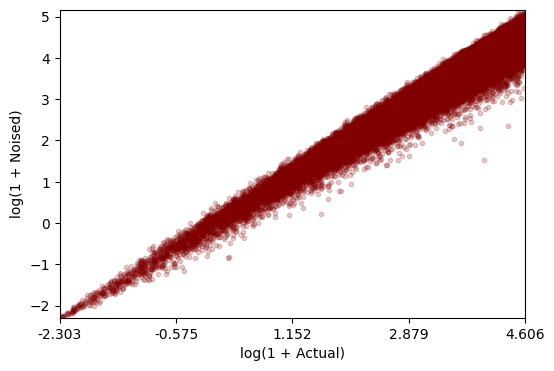

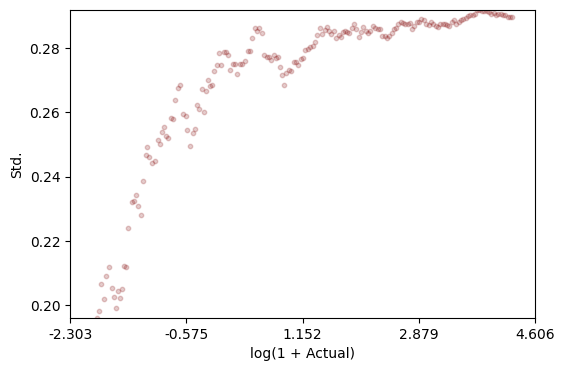

In [31]:
sewy = 0.1

initsamp_log1 = np.log(sewy + initsamp)
log1noise = np.log(sewy + multnoise)

log1noise_orig = [initsamp_log1, log1noise]

log1noise_std  = se.WindowVal(initsamp_log1, log1noise, 
                             mode2 = [np.std, {}], **windv_args)

#lognoise_relstd = [lognoise_std[0], np.array(lognoise_std[1]) / np.array(lognoise_std[0])]

# viz.MultiPlot([log1noise_orig, log1noise_std], plt_mode = [viz.ScaPlot, sca_args], 
#               multi = True, paired = False, transpose=True,
#               indiv_args = {'ylabel': ['Noised', 'Std.', 'Noised', 'Std.']},
#               figsize = (10, 3));

for igset, gset in enumerate([log1noise_orig, log1noise_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xticks(np.linspace(np.log(sewy+samp_mi), np.log(sewy+samp_ma), 5), 
                  labels = np.round(np.linspace(np.log(sewy+samp_mi), np.log(sewy+samp_ma), 5), 3))
    ax.set_xlabel('log(1 + Actual)')
    if igset == 0: ax.set_ylabel('log(1 + Noised)')
    display(ax)

(array([6.0000e+00, 9.2000e+01, 1.4440e+03, 1.0820e+04, 3.1481e+04,
        3.6118e+04, 1.6760e+04, 3.0350e+03, 2.3500e+02, 9.0000e+00]),
 array([-1.02994906, -0.83018062, -0.63041218, -0.43064373, -0.23087529,
        -0.03110685,  0.1686616 ,  0.36843004,  0.56819849,  0.76796693,
         0.96773537]),
 <BarContainer object of 10 artists>)

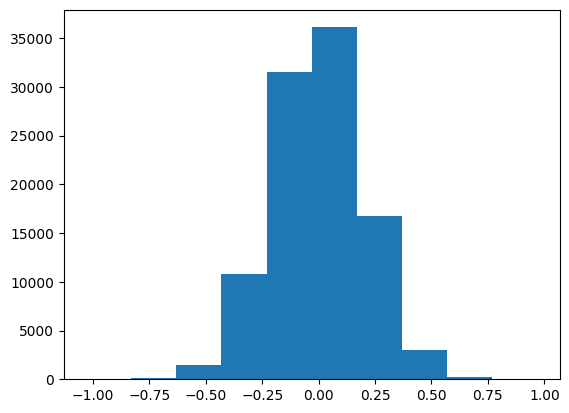

In [7]:
plt.hist(noise)

## LOG-SCALE GAUSSIAN

<Axes: xlabel='Real', ylabel='Noised'>

<Axes: xlabel='Real', ylabel='Std.'>

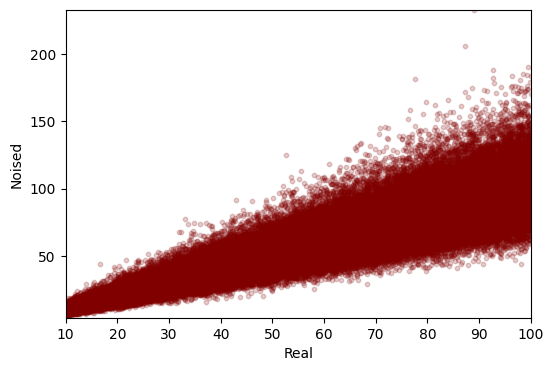

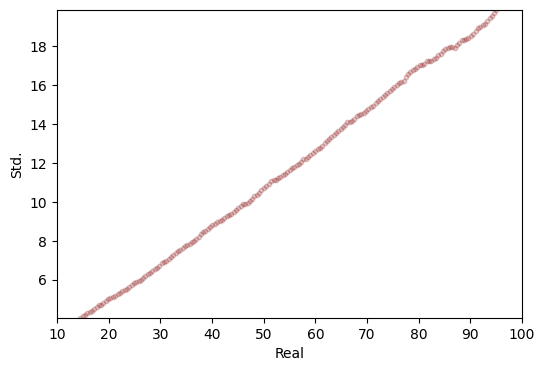

In [8]:
multnoise = initsamp*np.exp(noise)

multnoise_orig = [initsamp, multnoise]

multnoise_std  = se.WindowVal(initsamp, multnoise, 
                             mode2 = [np.std, {}], **windv_args)


for igset, gset in enumerate([multnoise_orig, multnoise_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xticks(np.linspace(samp_mi, samp_ma, 10), labels = np.arange(samp_mi, samp_ma + 2)[::10]);
    display(ax)

## Gamma and Beta Prime Noise 

In [18]:
dx1_real = np.random.uniform(1, 200, sez)
dx1_rep = np.array([np.mean(scipy.stats.gamma.rvs(der, size = 3)) for der in dx1_real])

dx2_real = np.random.uniform(5, 20, sez)
dx2_rep = np.array([np.mean(scipy.stats.gamma.rvs(der, size = 3)) for der in dx2_real])

### Gamma

<Axes: xlabel='Real', ylabel='Noised'>

<Axes: xlabel='Real', ylabel='Std.'>

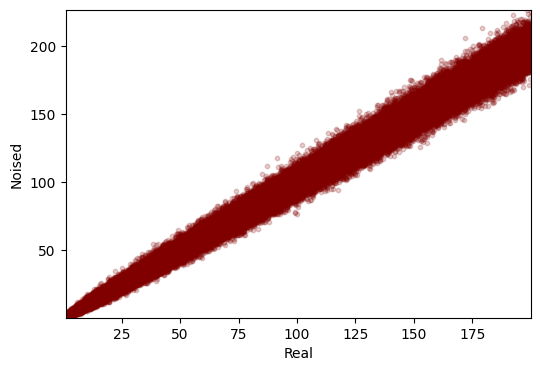

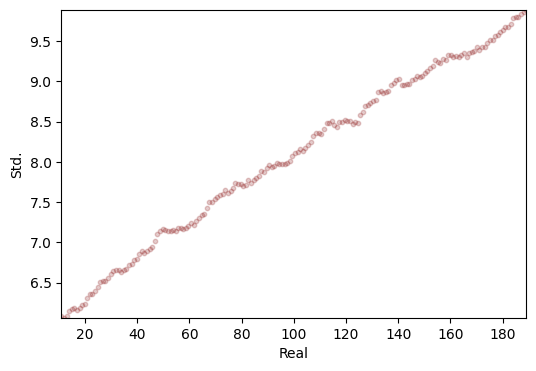

In [20]:
dx1_std  = se.WindowVal(dx1_real, dx1_rep, 
                             mode2 = [np.std, {}], **windv_args)


for igset, gset in enumerate([[dx1_real, dx1_rep], dx1_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    #ax.set_xticks(np.linspace(samp_mi, samp_ma, 10), labels = np.arange(samp_mi, samp_ma + 2)[::10]);
    display(ax)


In [16]:
dx1_real_log, dx1_rep_log = [np.log(x+1) for x in [dx1_real, dx1_rep]]

dx1_log_std  = se.WindowVal(dx1_real_log, dx1_rep_log, 
                             mode2 = [np.std, {}], **windv_args)

<Axes: xlabel='log(1 + Actual)', ylabel='log(1 + Noised)'>

<Axes: xlabel='log(1 + Actual)', ylabel='Std.'>

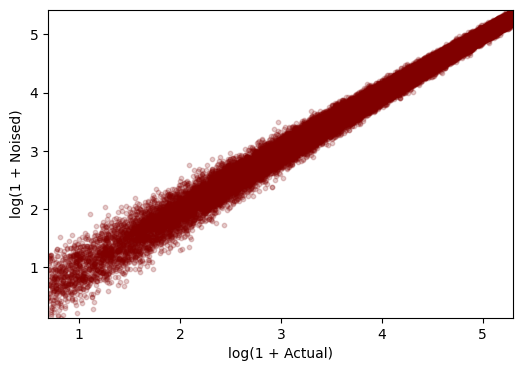

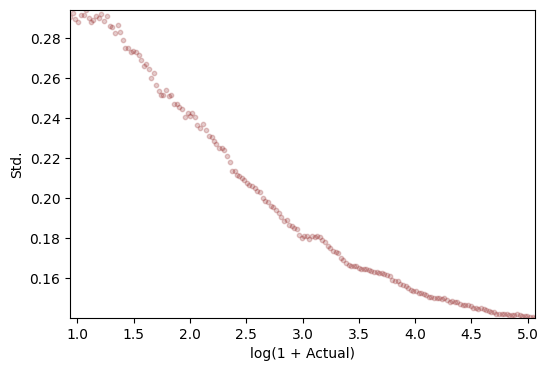

In [17]:
for igset, gset in enumerate([[dx1_real_log, dx1_rep_log], dx1_log_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    #ax.set_xticks(np.linspace(np.log(samp_mi), np.log(samp_ma), 5), labels = np.round(np.linspace(np.log(samp_mi), np.log(samp_ma), 5), 3))
    ax.set_xlabel('log(1 + Actual)')
    if igset == 0: ax.set_ylabel('log(1 + Noised)')
    display(ax)

In [18]:
dx1_rep.shape

(100000,)

In [21]:
dx1_rep_gz = dx1_rep > 1 ###############
dx1_real_ot, dx1_rep_ot = [x[dx1_rep_gz] for x in [dx1_real, dx1_rep]]



dx1_real_ot_log, dx1_rep_ot_log = [np.log(x) for x in [dx1_real_ot, dx1_rep_ot]]

dx1_ot_log_std  = se.WindowVal(dx1_real_ot_log, dx1_rep_ot_log, 
                             mode2 = [np.std, {}], **windv_args)

<Axes: xlabel='log(1 + Actual)', ylabel='log(1 + Noised)'>

<Axes: xlabel='log(1 + Actual)', ylabel='Std.'>

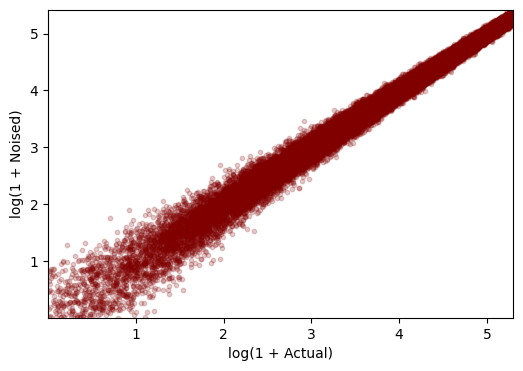

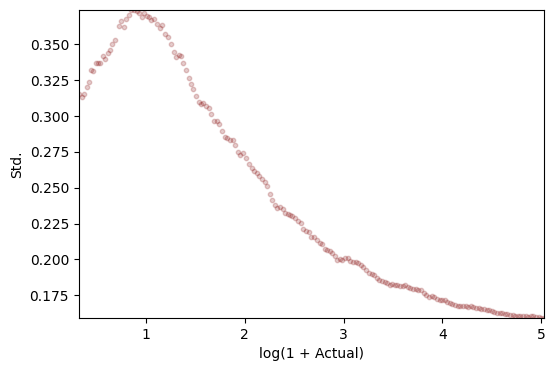

In [22]:
for igset, gset in enumerate([[dx1_real_ot_log, dx1_rep_ot_log], dx1_ot_log_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    #ax.set_xticks(np.linspace(np.log(samp_mi), np.log(samp_ma), 5), labels = np.round(np.linspace(np.log(samp_mi), np.log(samp_ma), 5), 3))
    ax.set_xlabel('log(1 + Actual)')
    if igset == 0: ax.set_ylabel('log(1 + Noised)')
    display(ax)

### Beta Prime

<Axes: xlabel='Real', ylabel='Noised'>

<Axes: xlabel='Real', ylabel='Std.'>

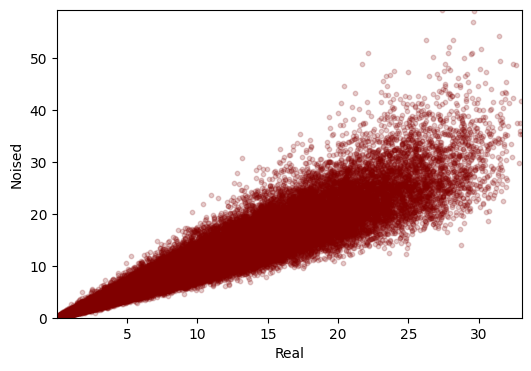

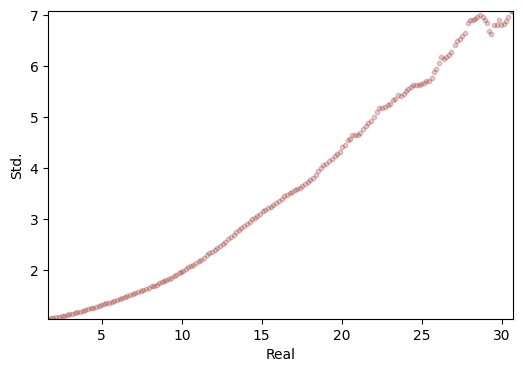

In [21]:

dxc_real_mod = tu.BetaPrime_Mode(dx1_real, dx2_real)

dxc_rep_mod = tu.BetaPrime_Mode(dx1_rep, dx2_rep)

sbp_std  = se.WindowVal(dxc_real_mod, dxc_rep_mod, 
                             mode2 = [np.std, {}], **windv_args)

for igset, gset in enumerate([[dxc_real_mod, dxc_rep_mod], sbp_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    #ax.set_xticks(np.linspace(samp_mi, samp_ma, 10), labels = np.arange(samp_mi, samp_ma + 2)[::10]);
    display(ax)

<Axes: xlabel='log(Real + 1)', ylabel='log(Noised + 1)'>

<Axes: xlabel='log(Real + 1)', ylabel='log(Noised + 1)'>

<Axes: xlabel='log(Real + 1)', ylabel='Std.'>

<Axes: xlabel='log(Real + 1)', ylabel='Std.'>

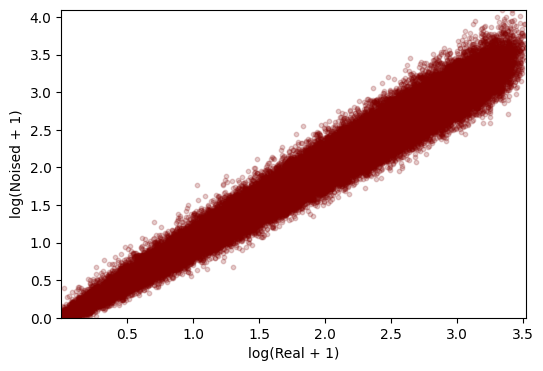

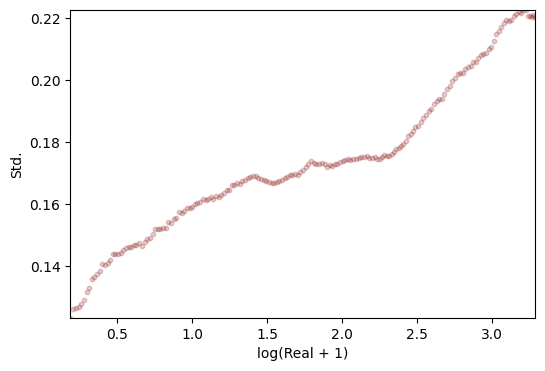

In [24]:
dxc_real_mod_log, dxc_rep_mod_log = [np.log(x+1) for x in [dxc_real_mod, dxc_rep_mod]]

sbp_log_std  = se.WindowVal(dxc_real_mod_log, dxc_rep_mod_log, 
                             mode2 = [np.std, {}], **windv_args)

for igset, gset in enumerate([[dxc_real_mod_log, dxc_rep_mod_log], sbp_log_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xlabel('log(Real + 1)')
    if igset == 0: ax.set_ylabel('log(Noised + 1)')
    display(ax)
    #ax.set_xticks(np.linspace(samp_mi, samp_ma, 10), labels = np.arange(samp_mi, samp_ma + 2)[::10]);
    display(ax)

<Axes: xlabel='log(Real + 0.001)', ylabel='log(Noised + 0.001)'>

<Axes: xlabel='log(Real + 0.001)', ylabel='log(Noised + 0.001)'>

<Axes: xlabel='log(Real + 0.001)', ylabel='Std.'>

<Axes: xlabel='log(Real + 0.001)', ylabel='Std.'>

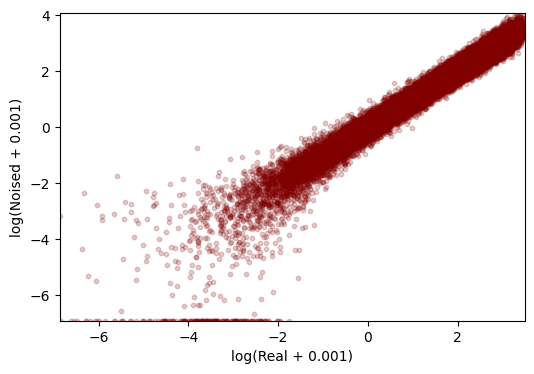

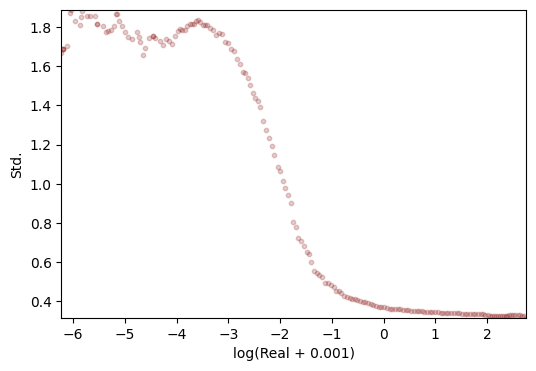

In [25]:
dxc_real_mod_log, dxc_rep_mod_log = [np.log(x+0.001) for x in [dxc_real_mod, dxc_rep_mod]]

sbp_log_std  = se.WindowVal(dxc_real_mod_log, dxc_rep_mod_log, 
                             mode2 = [np.std, {}], **windv_args)

for igset, gset in enumerate([[dxc_real_mod_log, dxc_rep_mod_log], sbp_log_std]): 
    ax = viz.ScaPlot(gset, **sca_args, **ex_sca_args[igset]);
    ax.set_xlabel('log(Real + 0.001)')
    if igset == 0: ax.set_ylabel('log(Noised + 0.001)')
    display(ax)
    #ax.set_xticks(np.linspace(samp_mi, samp_ma, 10), labels = np.arange(samp_mi, samp_ma + 2)[::10]);
    display(ax)